Open the dataset blood_transfusion.csv with the following command:

In [1]:
import pandas as pd

blood_transfusion = pd.read_csv("../datasets/blood_transfusion.csv")
target_name = "Class"
data = blood_transfusion.drop(columns=target_name)
target = blood_transfusion[target_name]

blood_transfusion is a pandas dataframe. The column "Class" contains the target variable.
# Question 1 
(1/1 point)

Select the correct answers from the following proposals.
a) The problem to be solved is a regression problem
b) The problem to be solved is a binary classification problem (exactly 2 possible classes)
c) The problem to be solved is a multiclass classification problem (more than 2 possible classes)
d) The proportions of the class counts are imbalanced: some classes have more than twice as many rows than others 

In [2]:
data

,Recency,Frequency,Monetary,Time
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77
...,...,...,...,...
743,23,2,500,38
744,21,2,500,52
745,23,3,750,62
746,39,1,250,39


In [3]:
target

0          donated
1          donated
2          donated
3          donated
4      not donated
          ...     
743    not donated
744    not donated
745    not donated
746    not donated
747    not donated
Name: Class, Length: 748, dtype: object

In [7]:
target.value_counts().sort_index()

donated        178
not donated    570
Name: Class, dtype: int64

In [8]:
target.unique()

array(['donated', 'not donated'], dtype=object)

# Question 2 
(1/1 point)

Using a sklearn.dummy.DummyClassifier and the strategy "most_frequent", what is the average of the accuracy scores obtained by performing a 10-fold cross-validation?
a) ~25%
b) ~50%
c) ~75% c) ~75% - correct

Hint: You can check the documentation of sklearn.model_selection.cross_val_score here and sklearn.model_selection.cross_validate here.

# Question 3
(1/1 point)

Repeat the previous experiment but compute the balanced accuracy instead of the accuracy score. Pass scoring="balanced_accuracy" when calling cross_validate or cross_val_score functions, the mean score is:
a) ~25%
b) ~50% b) ~50% - correct
c) ~75% 

In [12]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier

dumdum = DummyClassifier(strategy="most_frequent")
cross_val = cross_validate(dumdum, data, target, cv=10, scoring="balanced_accuracy")
print(cross_val['test_score'])
cv_score = cross_val_score(dumdum, data, target, cv=10, scoring="balanced_accuracy")
print(cv_score)

[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]


# Question 4
(1 point possible)

We will use a sklearn.neighbors.KNeighborsClassifier for the remainder of this quiz.

Why is it relevant to add a preprocessing step to scale the data using a StandardScaler when working with a KNeighborsClassifier?
a) faster to compute the list of neighbors on scaled data a) faster to compute the list of neighbors on scaled data - incorrect
b) k-nearest neighbors is based on computing some distances. Features need to be normalized to contribute approximately equally to the distance computation.
c) This is irrelevant. One could use k-nearest neighbors without normalizing the dataset and get a very similar cross-validation score. 

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model1 = make_pipeline(StandardScaler(), KNeighborsClassifier())
model1.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'kneighborsclassifier': KNeighborsClassifier(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': None,
 'kneighborsclassifier__n_neighbors': 5,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'uniform'}

solution: b)

Computing distances on scaled or un-scaled data takes similar time but the resulting distance values could be very different and therefore ordering of which sample is a closest neighbor to which sample also.
For instance: if you have two variables A and B, where A has values which vary between 0 and 1000000 (e.g. the price of a house in euros) and B is a variable that varies between 0 and 30 (e.g. the average outside air temperature in Celsius degrees), then computing distances between rows of such a database will be mostly impacted by the differences in values of the A column and the values of B column will be comparatively ignored.
If one applies StandardScaler to such a database, both the values of A and B will be approximately between -3 and 3 and the neighbor structure will be impacted by both variables.

# Question 5
(1/1 point)

Create a scikit-learn pipeline (using sklearn.pipeline.make_pipeline) where a StandardScaler will be used to scale the data followed by a KNeighborsClassifier. Use the default hyperparameters.

Inspect the parameters of the created pipeline. What is the value of K, the number of neighbors considered when predicting with the k-nearest neighbors?
a) 1
b) 3
c) 5 c) 5 - correct
d) 8
e) 10

Hint: You can use model.get_params() to get the parameters of a scikit-learn estimator. 

In [18]:
model2 = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=1))
cross_val = cross_validate(model2, data, target, cv=10, scoring="balanced_accuracy", return_train_score=True)
cross_val

{'fit_time': array([0.00706315, 0.00709295, 0.00382113, 0.00324011, 0.00381589,
        0.00345612, 0.00349784, 0.00326204, 0.00354671, 0.00325799]),
 'score_time': array([0.01047587, 0.00914288, 0.00470901, 0.00388193, 0.0043509 ,
        0.0040319 , 0.00403905, 0.0037179 , 0.00394917, 0.00396895]),
 'test_score': array([0.51315789, 0.49122807, 0.4751462 , 0.2997076 , 0.39473684,
        0.43859649, 0.56432749, 0.58333333, 0.45665635, 0.50309598]),
 'train_score': array([0.8909174 , 0.89357943, 0.89458455, 0.89384137, 0.89320785,
        0.88635478, 0.88148148, 0.87465887, 0.89300546, 0.87503178])}

In [16]:
print(f"Test score avg: {cross_val['test_score'].mean():.3f}")
print(f"Train score avg: {cross_val['train_score'].mean():.3f}")

Test score avg: 0.472
Train score avg: 0.888


# Question 6
(1/1 point)

Set n_neighbors=1 in the previous model and evaluate it using a 10-fold cross-validation. Use the balanced accuracy as a score. What can you say about this model? Compare the average of the train and test scores to argument your answer.
a) The model clearly underfits
b) The model generalizes
c) The model clearly overfits c) The model clearly overfits - correct

Hint: compute the average test score and the average train score and compare them. Make sure to pass return_train_score=True to the cross_validate function to also compute the train score.

# Question 7 
(1/1 point)

We will now study the effect of the parameter n_neighbors on the train and test score using a validation curve. You can use the following parameter range:

param_range = [1, 2, 5, 10, 20, 50, 100, 200, 500]

Also, use a 5-fold cross-validation and compute the balanced accuracy score instead of the default accuracy score (check the scoring parameter). Finally, plot the average train and test scores for the different value of the hyperparameter. We recall that the name of the parameter can be found using model.get_params().

Select the true affirmations stated below:
a) The model underfits for a range of n_neighbors values between 1 to 10
b) The model underfits for a range of n_neighbors values between 10 to 100
c) The model underfits for a range of n_neighbors values between 100 to 500 

In [21]:
from sklearn.model_selection import validation_curve

param_range = [1, 2, 5, 10, 20, 50, 100, 200, 500]
model3 = make_pipeline(StandardScaler(), KNeighborsClassifier())
train_scores3, test_scores3 = validation_curve(model3, data, target, cv=5, scoring="balanced_accuracy", param_name="kneighborsclassifier__n_neighbors", param_range=param_range)
print(f"Test score avg: {test_scores3.mean():.3f}")
print(f"Train score avg: {train_scores3.mean():.3f}")

Test score avg: 0.536
Train score avg: 0.665


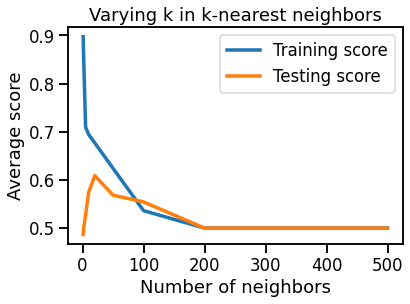

In [24]:
import matplotlib.pyplot as plt

plt.plot(param_range, train_scores3.mean(axis=1), label="Training score")
plt.plot(param_range, test_scores3.mean(axis=1), label="Testing score")
plt.legend()

plt.xlabel("Number of neighbors")
plt.ylabel("Average score")
_ = plt.title("Varying k in k-nearest neighbors")

# Question 8 (1/1 point)

Select the true affirmations stated below:
a) The model overfits for a range of n_neighbors values between 1 to 10 a) The model overfits for a range of <code>n_neighbors</code> values between 1 to 10 - correct
b) The model overfits for a range of n_neighbors values between 10 to 100
c) The model overfits for a range of n_neighbors values between 100 to 500 

# Question 9 (1/1 point)

Select which of the following statements are true:
a) The model best generalizes for a range of n_neighbors values between 1 to 10
b) The model best generalizes for a range of n_neighbors values between 10 to 100 b) The model best generalizes for a range of <code>n_neighbors</code> values between 10 to 100 - correct
c) The model best generalizes for a range of n_neighbors values between 100 to 500 